# Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plots
import seaborn as sns #graphs
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Descargamos los datos de Kaggle

In [ ]:
#kaggle
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c llovera-manana-samsung-ia-ed1-2021

KeyboardInterrupt: ignored

In [ ]:
!unzip train.csv.zip
!unzip test.csv.zip
!rm train.csv.zip
!rm test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


# EDA

In [ ]:
df = pd.read_csv('/content/train.csv')
df = df.set_index('id')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
id,,,,,,,,,,,,,,,,,,,,,,,
100511,2011-09-25,MountGambier,2.5,16.1,2.4,2.4,8.7,SE,37.0,ESE,E,20.0,19.0,54.0,48.0,1026.3,1022.8,1.0,3.0,12.5,15.5,Yes,No
107590,2014-10-19,Woomera,16.4,35.5,0.0,37.6,NaN,N,43.0,NNE,N,26.0,20.0,6.0,1.0,1020.6,1018.0,0.0,4.0,24.7,34.4,No,No
43808,2012-06-14,Wollongong,11.4,17.0,10.8,NaN,NaN,NW,28.0,SSW,NE,15.0,9.0,94.0,81.0,1019.9,1016.2,8.0,NaN,13.8,16.2,Yes,No
62101,2011-08-08,Sale,4.3,12.3,0.2,1.8,1.2,W,20.0,W,W,9.0,11.0,90.0,74.0,1011.3,1009.3,7.0,7.0,8.8,11.4,No,Yes
22518,2012-11-30,NorfolkIsland,18.3,23.2,0.0,5.0,11.2,ESE,31.0,SSW,SE,20.0,19.0,75.0,71.0,1017.0,1016.8,6.0,4.0,21.5,21.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88142,2011-07-31,Cairns,18.8,26.8,0.0,4.8,10.6,SE,44.0,S,SE,20.0,31.0,56.0,50.0,1018.0,1015.2,1.0,1.0,21.8,25.3,No,No
63254,2014-12-02,Sale,15.5,23.2,2.2,NaN,NaN,E,30.0,NaN,E,0.0,13.0,91.0,65.0,1010.1,1009.9,7.0,6.0,16.9,22.0,Yes,No
121788,2011-09-24,Perth,5.2,21.7,0.0,4.0,10.7,SSW,28.0,ESE,SSW,7.0,17.0,48.0,38.0,1021.4,1017.0,7.0,7.0,16.8,19.9,No,No


In [ ]:
df.shape

(101822, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101822 entries, 100511 to 66481
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           101822 non-null  object 
 1   Location       101822 non-null  object 
 2   MinTemp        100798 non-null  float64
 3   MaxTemp        100942 non-null  float64
 4   Rainfall       99552 non-null   float64
 5   Evaporation    58032 non-null   float64
 6   Sunshine       53029 non-null   float64
 7   WindGustDir    94596 non-null   object 
 8   WindGustSpeed  94638 non-null   float64
 9   WindDir9am     94462 non-null   object 
 10  WindDir3pm     98819 non-null   object 
 11  WindSpeed9am   100579 non-null  float64
 12  WindSpeed3pm   99642 non-null   float64
 13  Humidity9am    99990 non-null   float64
 14  Humidity3pm    98667 non-null   float64
 15  Pressure9am    91227 non-null   float64
 16  Pressure3pm    91249 non-null   float64
 17  Cloud9am       62820 non-

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,100798.000000,100942.000000,99552.000000,58032.000000,53029.000000,94638.000000,100579.000000,99642.000000,99990.000000,98667.000000,91227.000000,91249.000000,62820.000000,60391.000000,100591.000000,99278.000000
mean,12.186031,23.210768,2.370499,5.473151,7.621624,40.058211,14.049971,18.681199,68.857596,51.517103,1017.639643,1015.246401,4.445288,4.504032,16.981866,21.677229
std,6.401988,7.125698,8.473713,4.190682,3.783804,13.601408,8.921163,8.806190,19.050536,20.816307,7.106538,7.036580,2.887621,2.723028,6.495749,6.943786
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,31.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,76.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1024
MaxTemp            880
Rainfall          2270
Evaporation      43790
Sunshine         48793
WindGustDir       7226
WindGustSpeed     7184
WindDir9am        7360
WindDir3pm        3003
WindSpeed9am      1243
WindSpeed3pm      2180
Humidity9am       1832
Humidity3pm       3155
Pressure9am      10595
Pressure3pm      10573
Cloud9am         39002
Cloud3pm         41431
Temp9am           1231
Temp3pm           2544
RainToday         2270
RainTomorrow      2288
dtype: int64

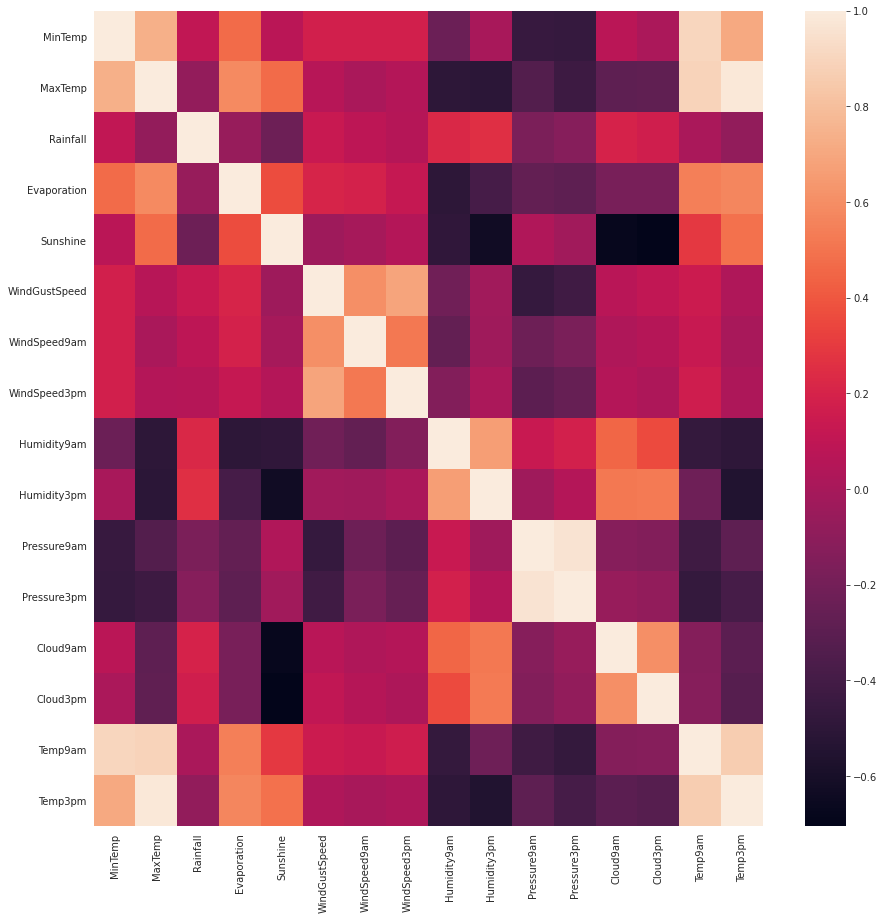

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9369bf8410>,
      dtype=object)

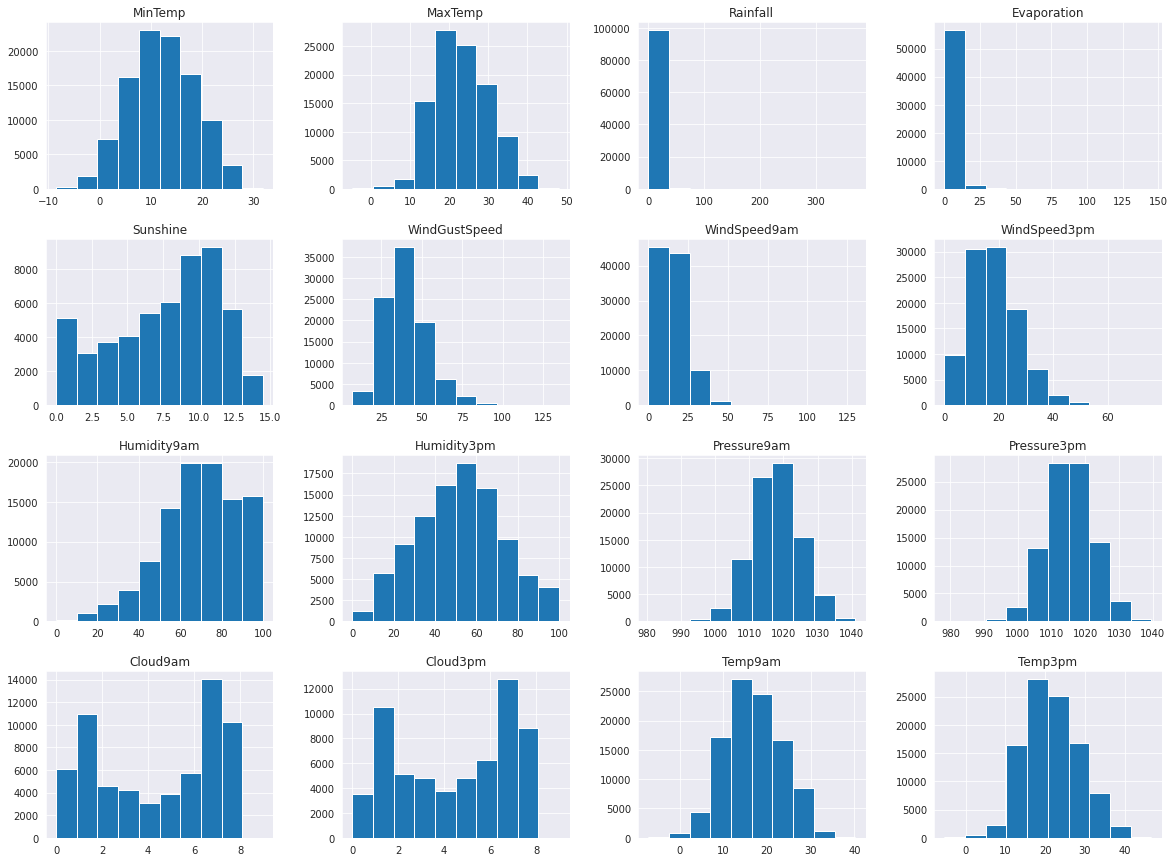

In [ ]:
df.hist(figsize=(20,15))

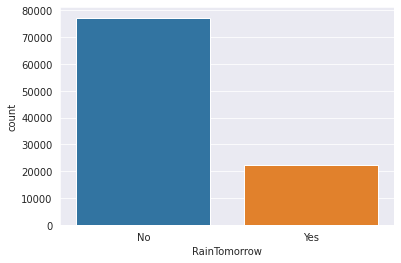

In [ ]:
sns.countplot(df['RainTomorrow'])

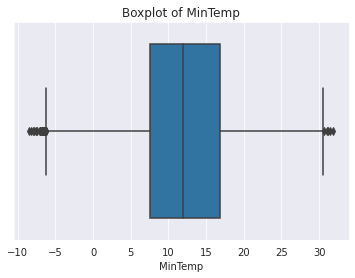

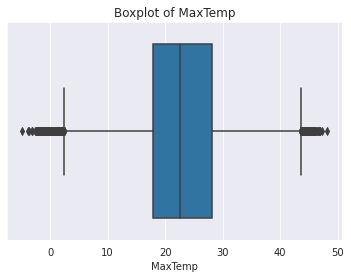

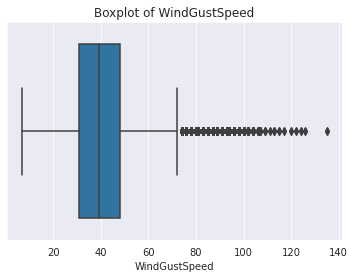

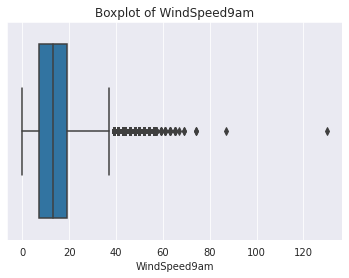

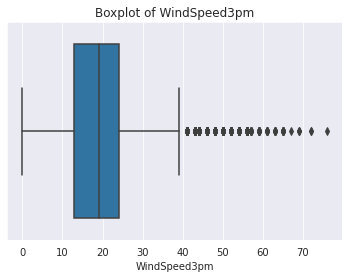

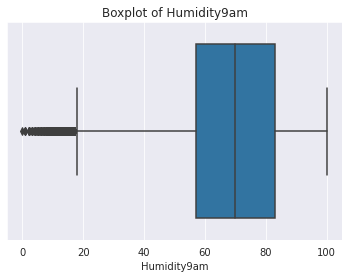

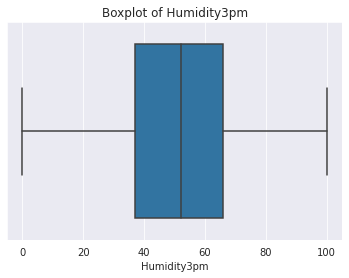

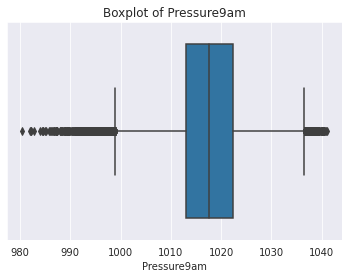

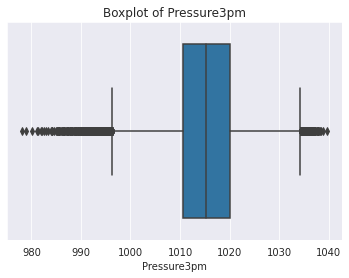

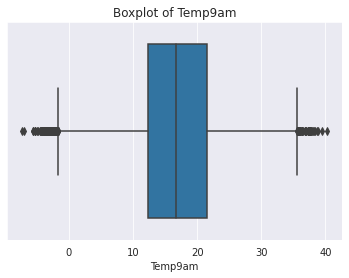

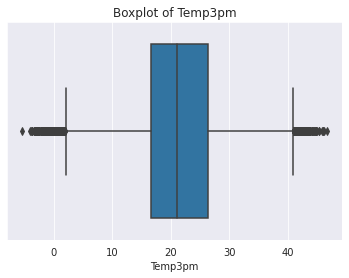

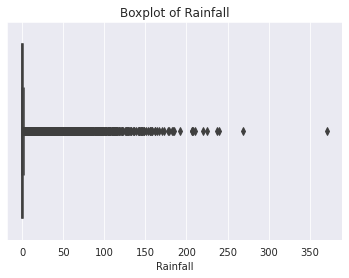

In [ ]:
outliars = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Rainfall']
for col in outliars:
    plt.title(f'Boxplot of {col}')
    sns.boxplot(df[col])
    plt.show()

In [ ]:
# función auxiliar para eliminar valores atípicos existentes
def remove_outliars(data):
    Q1 = data.quantile(0.10) #25th quantile of the column
    Q3 = data.quantile(0.90) #75th quantile of the column
    IQR = Q3 - Q1 #The difference between the 75th quantile and the 25th quantile of the column
    
    data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)] #Find all the datapoints in the column which are less than its 25th quantile and greater than its 75th quantile and remove them
    
    return data_clean #Return the data which has no outliars

In [ ]:
df[outliars] = remove_outliars(df[outliars])
df.shape

(101822, 23)

# Preprocess

In [ ]:
def pre_(df):

  #irrelevant 
  #df = df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location'],axis=1)

  # Date breakdown
  df.Date = df.Date.apply(pd.to_datetime)
  df['month'] = df.Date.apply(lambda x: x.month)
  df['day'] = df.Date.apply(lambda x: x.day)
  df['year'] = df.Date.apply(lambda x: x.year)

  df['month'] = preprocessing.MinMaxScaler().fit_transform(np.array(df['month']).reshape(-1,1))
  df['year'] = preprocessing.MinMaxScaler().fit_transform(np.array(df['year']).reshape(-1,1))

  df.drop(['Date'], 1, inplace = True)

  #Location
  # dummies para tener variables indicadoras
  df = pd.get_dummies(df, columns=['Location'])

  # Winds
  # reemplace la dirección con cos y sin para tener la distancia euclidiana
  dict_to_rand = {'ENE':'0.25,0.75', 'WNW':'0.25,-0.75', 'ESE':'-0.25,0.75', 'WSW':'-0.25,-0.75',
                  'N':'1,0', 'S':'-1,0', 'E':'0,1', 'W':'0,-1', 'NE':'0.5,0.5', 'NW':'0.5,-0.5', 'SE':'-0.5,0.5', 'SW':'-0.5,-0.5',
                'NNE':'0.75,0.25', 'NNW':'0.75,-0.25', 'SSE':'-0.75,0.25', 'SSW':'-0.75,-0.25'}

  winds = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

  for wind in winds:
    df[wind] = df[wind].fillna(df[wind].value_counts().idxmax())
    df = df.replace({wind: dict_to_rand})
    df = pd.concat([df[wind].str.split(',', expand=True).rename(columns={0: str(wind) + '_N', 1: str(wind) + '_E'}),  df], axis=1)

  df = df.drop(columns=winds)

  for wind in winds:
    df[str(wind) + '_N'] = preprocessing.MinMaxScaler().fit_transform(np.array(df[str(wind) + '_N']).reshape(-1,1))
    df[str(wind) + '_E'] = preprocessing.MinMaxScaler().fit_transform(np.array(df[str(wind) + '_E']).reshape(-1,1))

  # NaN fill
  # estimar la media o mediana de cada característica a partir de todas las demás.
  cols_median = ['Evaporation', 'Cloud3pm', 'Cloud9am']
  cols_mean = ['MinTemp', 'MaxTemp', 'Rainfall',  'Sunshine', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
              'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

  imp1= IterativeImputer(initial_strategy='mean')
  imp2= IterativeImputer(initial_strategy='median')

  for col in cols_mean:
    if col in df.columns:
      df[[col]]= imp1.fit_transform(df[[col]])
      df[col] = preprocessing.MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))

  for col in cols_median:
    if col in df.columns:
      df[[col]]= imp2.fit_transform(df[[col]])
      df[col] = preprocessing.MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))

  #Rain NaN Removal
  indexNaN = df[df['RainToday'].isna()].index
  df = df.drop(indexNaN)
  df = pd.get_dummies(df, columns=['RainToday'], drop_first=True)

  if 'RainTomorrow' in df.columns:  
    indexNaN = df[df['RainTomorrow'].isna()].index
    df = df.drop(indexNaN)
    df = pd.get_dummies(df, columns=['RainTomorrow'], drop_first=True)
  
  return df

In [ ]:
df = pre_(df)
df

,WindDir3pm_N,WindDir3pm_E,WindDir9am_N,WindDir9am_E,WindGustDir_N,WindGustDir_E,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,RainToday_Yes,RainTomorrow_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100511,0.500,1.000,0.375,0.875,0.250,0.750,0.272277,0.395085,0.154839,0.016552,0.600000,0.303030,0.338983,0.311475,0.54,0.48,0.750000,0.708839,0.111111,0.333333,0.415612,0.401152,0.727273,25,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
107590,1.000,0.500,0.875,0.625,1.000,0.500,0.616337,0.761815,0.000000,0.259310,0.525629,0.363636,0.440678,0.327869,0.06,0.01,0.653061,0.625650,0.000000,0.444444,0.672996,0.763916,0.818182,19,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43808,0.750,0.750,0.125,0.375,0.750,0.250,0.492574,0.412098,0.696774,0.033103,0.525629,0.212121,0.254237,0.147541,0.94,0.81,0.641156,0.594454,0.888889,0.500448,0.443038,0.414587,0.454545,14,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
62101,0.500,0.000,0.500,0.000,0.500,0.000,0.316832,0.323251,0.012903,0.012414,0.082759,0.131313,0.152542,0.180328,0.90,0.74,0.494898,0.474870,0.777778,0.777778,0.337553,0.322457,0.636364,8,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22518,0.250,0.750,0.125,0.375,0.375,0.875,0.663366,0.529301,0.000000,0.034483,0.772414,0.242424,0.338983,0.311475,0.75,0.71,0.591837,0.604853,0.666667,0.444444,0.605485,0.523992,0.909091,30,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88142,0.250,0.750,0.000,0.500,0.250,0.750,0.675743,0.597353,0.000000,0.033103,0.731034,0.373737,0.338983,0.508197,0.56,0.50,0.608844,0.577123,0.111111,0.111111,0.611814,0.589251,0.545455,31,0.4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63254,0.500,1.000,1.000,0.500,0.500,1.000,0.594059,0.529301,0.141935,0.033103,0.525629,0.232323,0.000000,0.213115,0.91,0.65,0.474490,0.485269,0.777778,0.666667,0.508439,0.525912,1.000000,2,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
121788,0.125,0.375,0.375,0.875,0.125,0.375,0.339109,0.500945,0.000000,0.027586,0.737931,0.212121,0.118644,0.278689,0.48,0.38,0.666667,0.608319,0.777778,0.777778,0.506329,0.485605,0.727273,24,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

WindDir3pm_N            0
WindDir3pm_E            0
WindDir9am_N            0
WindDir9am_E            0
WindGustDir_N           0
                       ..
Location_Witchcliffe    0
Location_Wollongong     0
Location_Woomera        0
RainToday_Yes           0
RainTomorrow_Yes        0
Length: 76, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98565 entries, 100511 to 66481
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WindDir3pm_N               98565 non-null  float64
 1   WindDir3pm_E               98565 non-null  float64
 2   WindDir9am_N               98565 non-null  float64
 3   WindDir9am_E               98565 non-null  float64
 4   WindGustDir_N              98565 non-null  float64
 5   WindGustDir_E              98565 non-null  float64
 6   MinTemp                    98565 non-null  float64
 7   MaxTemp                    98565 non-null  float64
 8   Rainfall                   98565 non-null  float64
 9   Evaporation                98565 non-null  float64
 10  Sunshine                   98565 non-null  float64
 11  WindGustSpeed              98565 non-null  float64
 12  WindSpeed9am               98565 non-null  float64
 13  WindSpeed3pm               98565 non-null

In [ ]:
np.abs(df.corr()['RainTomorrow_Yes']).sort_values(ascending=False)

RainTomorrow_Yes             1.000000
Humidity3pm                  0.397775
Sunshine                     0.329093
RainToday_Yes                0.314433
Cloud3pm                     0.303803
                               ...   
Location_Adelaide            0.001888
Location_MelbourneAirport    0.001858
Location_Launceston          0.001203
Location_Brisbane            0.000244
day                          0.000193
Name: RainTomorrow_Yes, Length: 76, dtype: float64

## Reducion Dimensional

In [ ]:
X = df.drop("RainTomorrow_Yes", axis = 1)
y = df["RainTomorrow_Yes"].copy()

In [ ]:
# select k features para deep learning
from sklearn.feature_selection import SelectKBest, f_classif

skb= SelectKBest(score_func= f_classif, k=15)
X_new= skb.fit_transform(X, y)

# cols = skb.get_support(indices=True)

X_new.shape

ss=StandardScaler()

X_train_new, X_test_new, y_train_new, y_test_new= train_test_split(X_new,y,test_size=0.2, stratify=y)
X_train_new = ss.fit_transform(X_train_new)
X_test_new = ss.transform(X_test_new)

In [ ]:
# features para machine learning
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.02, penalty="l1", dual=False,random_state=9).fit(X, y) #Linear Support Vector Classification.
model = SelectFromModel(lsvc, prefit=True) # Metatransformador para seleccionar características basadas en pesos de importancia.
X_new = model.transform(X)
cc = list(X.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['WindDir3pm_N', 'WindDir9am_N', 'WindGustDir_N', 'WindGustDir_E', 'MinTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'month', 'day', 'Location_Adelaide', 'Location_Ballarat', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Darwin', 'Location_Hobart', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_MountGambier', 'Location_MountGinini', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Penrith', 'Location_Perth', 'Location_Portland', 'Location_Sale', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Walpole', 'Location_Watsonia', 'Location_Witchcliffe', 'Location_Wollongong', 'Location_Woomera', 'RainToday_Yes']
47


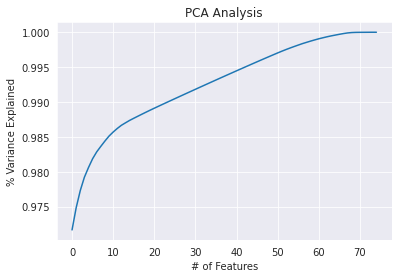

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of Features')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [ ]:
X = df[cc] 

ss=StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4815)
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

# Machine Learning

In [ ]:
#machine learning
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

gridCV = GridSearchCV(RandomForestClassifier(bootstrap=True), param_grid, cv=2, n_jobs = -1, verbose=3.5)   
gridCV.fit(X_train, y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 82.5min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 107.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     23069
           1       0.77      0.48      0.59      6501

    accuracy                           0.85     29570
   macro avg       0.82      0.72      0.75     29570
weighted avg       0.85      0.85      0.84     29570



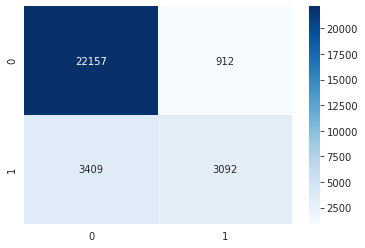

In [ ]:


# best_depth = gridCV.best_params_['max_depth']
# # best_features = gridCV.best_params_['max_features']
# best_leaf = gridCV.best_params_['min_samples_leaf']
# best_split = gridCV.best_params_['min_samples_split']
# best_estimator = gridCV.best_params_['n_estimators'] 

# print('Best max_depth: ',gridCV.best_params_['max_depth'])
# print('Best max_features: ',gridCV.best_params_['max_features'])
# print('Best min_samples_leaf: ',gridCV.best_params_['min_samples_leaf'])
# print('Best min_samples_split: ',gridCV.best_params_['min_samples_split'])
# print('Best n_estimators: ',gridCV.best_params_['n_estimators'])

# rfc = RandomForestClassifier(bootstrap=True, max_depth = best_depth, max_features= best_features, min_samples_leaf=best_leaf, min_samples_split=best_split, n_estimators=best_estimator)
# rfc.fit(X_train, y_train)

y_pred = gridCV.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, fmt='d', annot=True, cmap=plt.cm.Blues)
print(metrics.classification_report(y_test, y_pred))

## Deep Learning

In [ ]:
from tensorflow import device
from tensorflow.keras.layers import Input, Dense, ReLU
from tensorflow.keras.layers import Dropout, add, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model, losses
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.models import Sequential

In [ ]:
def create_model():
  model= Sequential()

  model.add(Dense(2048, activation='relu', input_dim= X_new.shape[1]))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(712, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
    
  return model

In [ ]:
model = create_model()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, mode="auto")

with device('/device:GPU:0'):
    clear_session()
    model.compile(
        loss='binary_crossentropy', 
        optimizer=RMSprop(),
        metrics=['accuracy'])
    history = model.fit(X_train_new, y_train_new,
                     validation_data=(X_test_new,y_test_new),
                     callbacks=[early_stopping],
                     epochs=100, batch_size=256, verbose=1)

Epoch 1/100
309/309 [==============================] - 43s 133ms/step - loss: 0.4042 - accuracy: 0.8277 - val_loss: 0.5334 - val_accuracy: 0.8266
Epoch 2/100
309/309 [==============================] - 41s 133ms/step - loss: 0.3569 - accuracy: 0.8475 - val_loss: 0.3658 - val_accuracy: 0.8365
Epoch 3/100
309/309 [==============================] - 41s 133ms/step - loss: 0.3503 - accuracy: 0.8490 - val_loss: 0.4262 - val_accuracy: 0.8438
Epoch 4/100
309/309 [==============================] - 41s 133ms/step - loss: 0.3450 - accuracy: 0.8500 - val_loss: 0.3581 - val_accuracy: 0.8416
Epoch 5/100
309/309 [==============================] - 41s 133ms/step - loss: 0.3431 - accuracy: 0.8510 - val_loss: 0.3783 - val_accuracy: 0.8443
Epoch 6/100
309/309 [==============================] - 41s 133ms/step - loss: 0.3416 - accuracy: 0.8532 - val_loss: 0.3718 - val_accuracy: 0.8431
Epoch 7/100
309/309 [==============================] - 41s 132ms/step - loss: 0.3332 - accuracy: 0.8573 - val_loss: 0.3558 -

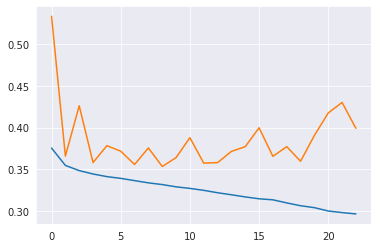

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

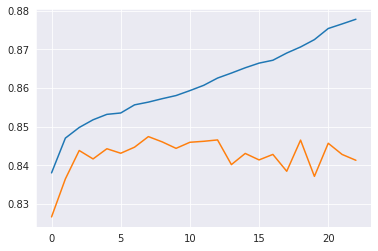

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.evaluate(X_train_new, y_train_new)

2465/2465 [==============================] - 23s 9ms/step - loss: 0.2932 - accuracy: 0.8827


[0.29321181774139404, 0.8826916217803955]

In [ ]:
model.evaluate(X_test_new,y_test_new)

617/617 [==============================] - 6s 9ms/step - loss: 0.3991 - accuracy: 0.8413


[0.399099737405777, 0.841272234916687]

In [ ]:
predictions = model.predict(X_test_new)

predict=[]
for i in predictions:
    if i<0.5:
        predict.append(0)
    else:
        predict.append(1)

y_pred = predict
# y_pred = np.around(y_pred)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15340
           1       0.67      0.57      0.61      4373

    accuracy                           0.84     19713
   macro avg       0.77      0.74      0.76     19713
weighted avg       0.83      0.84      0.84     19713



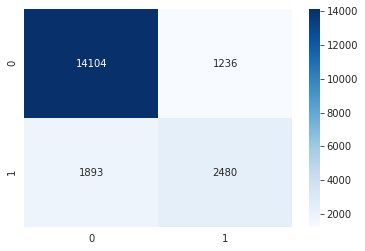

In [ ]:
conf_matrix = confusion_matrix(y_test_new, y_pred)
sns.heatmap(conf_matrix, fmt='d', annot=True, cmap=plt.cm.Blues)
print(classification_report(y_test_new, y_pred))

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test = df_test.set_index('id')
df_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
id,,,,,,,,,,,,,,,,,,,,,,
132547,2016-02-28,Hobart,17.5,19.5,0.0,7.8,0.0,NW,63.0,NW,S,9.0,11.0,51.0,82.0,1015.8,1020.2,7.0,8.0,18.1,13.5,No
119674,2014-11-05,PerthAirport,9.0,28.4,0.0,7.4,12.4,SW,37.0,SW,W,15.0,20.0,49.0,40.0,1019.0,1014.5,2.0,6.0,21.5,27.0,No
39095,2016-04-09,WaggaWagga,4.2,24.0,0.0,2.8,10.8,WSW,28.0,ESE,W,11.0,11.0,57.0,23.0,1023.3,1019.7,1.0,6.0,14.1,23.2,No
103060,2010-05-23,Nuriootpa,7.0,13.3,0.0,3.2,0.0,NE,52.0,ENE,NE,20.0,19.0,61.0,74.0,1015.7,1011.7,7.0,8.0,9.7,10.5,No
38495,2014-08-18,WaggaWagga,7.9,18.3,4.0,1.6,6.2,SSW,35.0,SSW,SW,17.0,22.0,61.0,64.0,1012.2,1012.1,7.0,7.0,14.4,16.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132661,2016-06-21,Hobart,3.3,11.8,14.4,2.4,0.1,SW,50.0,SSW,WNW,20.0,7.0,84.0,64.0,993.1,987.7,8.0,7.0,9.2,11.1,Yes
10463,2013-01-06,CoffsHarbour,19.0,27.3,0.0,7.0,7.6,E,30.0,WSW,E,9.0,17.0,66.0,60.0,1020.3,1019.7,6.0,2.0,25.7,26.8,No
101989,2015-12-10,MountGambier,8.2,24.8,0.0,5.6,10.7,W,50.0,NNW,W,13.0,31.0,62.0,43.0,1015.6,1012.4,7.0,3.0,16.2,21.1,No


In [ ]:
df_test.shape

(16728, 22)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 132547 to 70266
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           16728 non-null  object 
 1   Location       16728 non-null  object 
 2   MinTemp        16728 non-null  float64
 3   MaxTemp        16728 non-null  float64
 4   Rainfall       16728 non-null  float64
 5   Evaporation    16728 non-null  float64
 6   Sunshine       16728 non-null  float64
 7   WindGustDir    16728 non-null  object 
 8   WindGustSpeed  16728 non-null  float64
 9   WindDir9am     16728 non-null  object 
 10  WindDir3pm     16728 non-null  object 
 11  WindSpeed9am   16728 non-null  float64
 12  WindSpeed3pm   16728 non-null  float64
 13  Humidity9am    16728 non-null  float64
 14  Humidity3pm    16728 non-null  float64
 15  Pressure9am    16728 non-null  float64
 16  Pressure3pm    16728 non-null  float64
 17  Cloud9am       16728 non-null  float64
 18  C

In [ ]:
df_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000
mean,13.498231,24.235103,2.120367,5.506301,7.724940,40.913678,15.620158,19.809660,65.954687,49.754185,1017.264724,1014.823242,4.241272,4.344751,18.241332,22.721150
std,6.438587,6.986409,6.802819,3.703589,3.757418,13.469311,8.276520,8.542538,18.431941,20.123385,6.890828,6.839384,2.789353,2.638078,6.578450,6.847785
min,-5.800000,4.100000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,1.000000,1.000000,982.900000,977.100000,0.000000,0.000000,-0.600000,3.700000
25%,8.500000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.600000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.500000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.900000,1019.500000,7.000000,7.000000,23.300000,27.900000
max,29.700000,47.300000,168.400000,81.200000,14.300000,122.000000,67.000000,76.000000,100.000000,100.000000,1039.300000,1037.000000,8.000000,8.000000,39.100000,46.100000


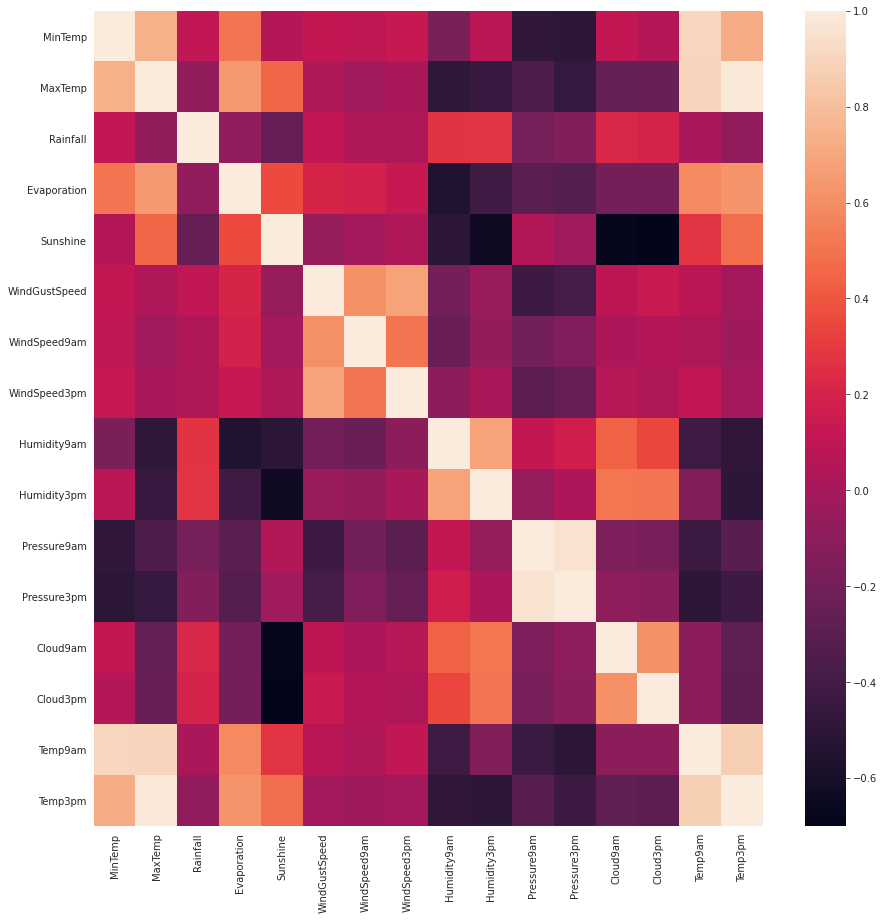

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_test.corr(), annot=False)

In [ ]:
df_test.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9368319bd0>,
      dtype=object)

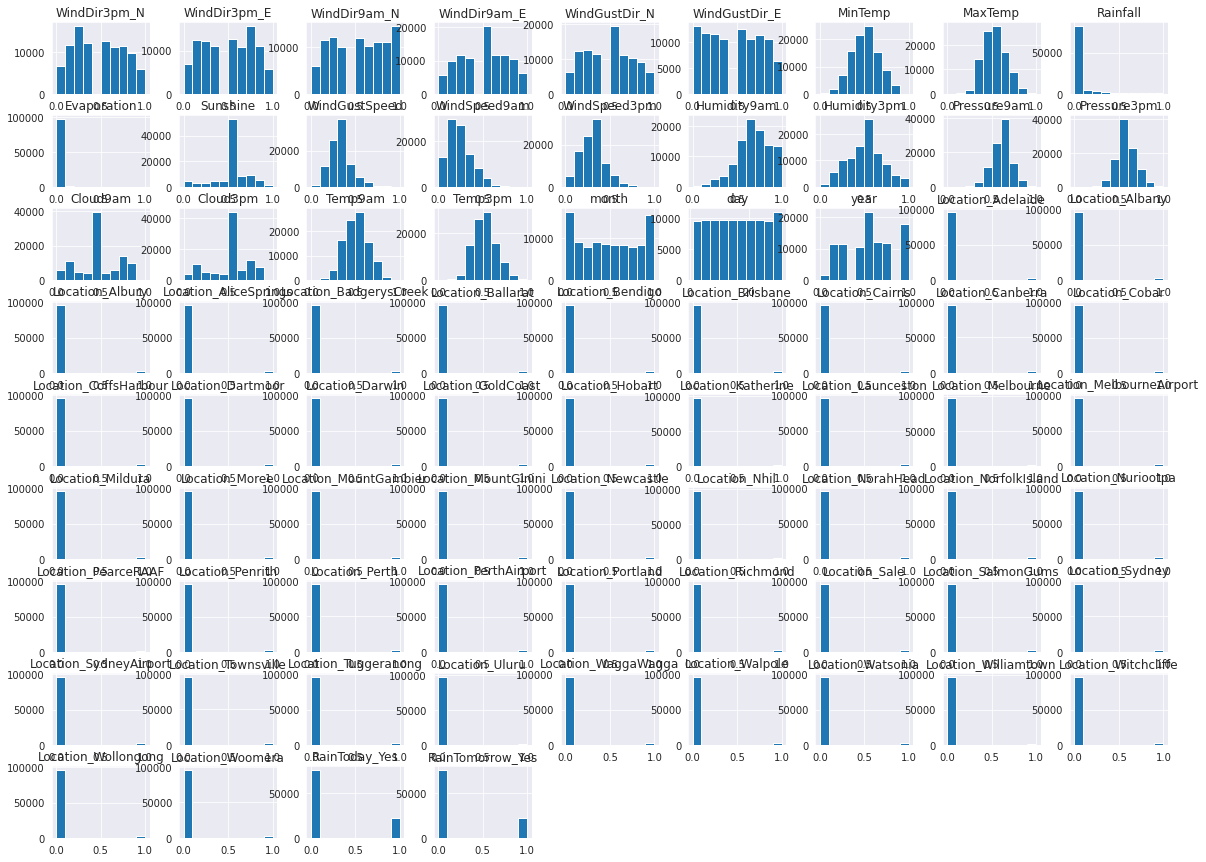

In [ ]:
df.hist(figsize=(20,15))

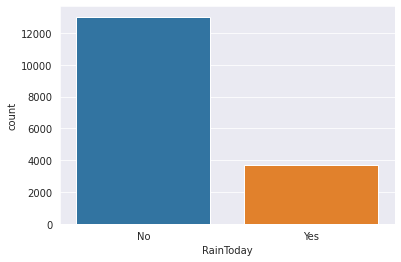

In [ ]:
sns.countplot(df_test['RainToday'])

In [ ]:
df_test = pre_(df_test)
df_test

,WindDir3pm_N,WindDir3pm_E,WindDir9am_N,WindDir9am_E,WindGustDir_N,WindGustDir_E,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,RainToday_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132547,0.000,0.500,0.750,0.250,0.750,0.250,0.656338,0.356481,0.000000,0.096059,0.000000,0.468468,0.107692,0.121622,0.505051,0.818182,0.583333,0.719533,0.875,1.000,0.471033,0.231132,0.090909,28,0.9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119674,0.500,0.000,0.250,0.250,0.250,0.250,0.416901,0.562500,0.000000,0.091133,0.867133,0.234234,0.200000,0.243243,0.484848,0.393939,0.640071,0.624374,0.250,0.750,0.556675,0.549528,0.909091,5,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
39095,0.500,0.000,0.375,0.875,0.375,0.125,0.281690,0.460648,0.000000,0.034483,0.755245,0.153153,0.138462,0.121622,0.565657,0.222222,0.716312,0.711185,0.125,0.750,0.370277,0.459906,0.272727,9,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
103060,0.750,0.750,0.625,0.875,0.750,0.750,0.360563,0.212963,0.000000,0.039409,0.000000,0.369369,0.276923,0.229730,0.606061,0.737374,0.581560,0.577629,0.875,1.000,0.259446,0.160377,0.363636,23,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
38495,0.250,0.250,0.125,0.375,0.125,0.375,0.385915,0.328704,0.023753,0.019704,0.433566,0.216216,0.230769,0.270270,0.606061,0.636364,0.519504,0.584307,0.875,0.875,0.377834,0.290094,0.636364,18,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132661,0.625,0.125,0.125,0.375,0.250,0.250,0.256338,0.178241,0.085511,0.029557,0.006993,0.351351,0.276923,0.067568,0.838384,0.636364,0.180851,0.176962,1.000,0.875,0.246851,0.174528,0.454545,21,0.9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10463,0.500,1.000,0.375,0.125,0.500,1.000,0.698592,0.537037,0.000000,0.086207,0.531469,0.171171,0.107692,0.202703,0.656566,0.595960,0.663121,0.711185,0.750,0.250,0.662469,0.544811,0.000000,6,0.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101989,0.500,0.000,0.875,0.375,0.500,0.000,0.394366,0.479167,0.000000,0.068966,0.748252,0.351351,0.169231,0.391892,0.616162,0.424242,0.579787,0.589316,0.875,0.375,0.423174,0.410377,1.000000,10,0.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
column_names_df = []
for column in df.columns:
    if 'Location_' in column:
        column_names_df.append(column)

column_names_df_test = []
for column in df_test.columns:
    if 'Location_' in column:
        column_names_df_test.append(column)

difference = []
for column in column_names_df:
        if column not in column_names_df_test:
            difference.append(column)

df_test = pd.concat([df_test, pd.DataFrame(columns=difference)])

for value in difference:
    df_test[value] = 0

df_test

,WindDir3pm_N,WindDir3pm_E,WindDir9am_N,WindDir9am_E,WindGustDir_N,WindGustDir_E,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,RainToday_Yes,Location_Adelaide,Location_Albany,Location_Albury,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Dartmoor,Location_GoldCoast,Location_Katherine,Location_Launceston,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_PearceRAAF,Location_Penrith,Location_Richmond,Location_SalmonGums,Location_Tuggeranong,Location_Uluru,Location_Walpole,Location_Witchcliffe,Location_Wollongong
132547,0.000,0.500,0.750,0.250,0.750,0.250,0.656338,0.356481,0.000000,0.096059,0.000000,0.468468,0.107692,0.121622,0.505051,0.818182,0.583333,0.719533,0.875,1.000,0.471033,0.231132,0.090909,28.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119674,0.500,0.000,0.250,0.250,0.250,0.250,0.416901,0.562500,0.000000,0.091133,0.867133,0.234234,0.200000,0.243243,0.484848,0.393939,0.640071,0.624374,0.250,0.750,0.556675,0.549528,0.909091,5.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39095,0.500,0.000,0.375,0.875,0.375,0.125,0.281690,0.460648,0.000000,0.034483,0.755245,0.153153,0.138462,0.121622,0.565657,0.222222,0.716312,0.711185,0.125,0.750,0.370277,0.459906,0.272727,9.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103060,0.750,0.750,0.625,0.875,0.750,0.750,0.360563,0.212963,0.000000,0.039409,0.000000,0.369369,0.276923,0.229730,0.606061,0.737374,0.581560,0.577629,0.875,1.000,0.259446,0.160377,0.363636,23.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38495,0.250,0.250,0.125,0.375,0.125,0.375,0.385915,0.328704,0.023753,0.019704,0.433566,0.216216,0.230769,0.270270,0.606061,0.636364,0.519504,0.584307,0.875,0.875,0.377834,0.290094,0.636364,18.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132661,0.625,0.125,0.125,0.375,0.250,0.250,0.256338,0.178241,0.085511,0.029557,0.006993,0.351351,0.276923,0.067568,0.838384,0.636364,0.180851,0.176962,1.000,0.875,0.246851,0.174528,0.454545,21.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10463,0.500,1.000,0.375,0.125,0.500,1.000,0.698592,0.537037,0.000000,0.086207,0.531469,0.171171,0.107692,0.202703,0.656566,0.595960,0.663121,0.711185,0.750,0.250,0.662469,0.544811,0.000000,6.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101989,0.500,0.000,0.875,0.375,0.500,0.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 132547 to 70266
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WindDir3pm_N               16728 non-null  float64
 1   WindDir3pm_E               16728 non-null  float64
 2   WindDir9am_N               16728 non-null  float64
 3   WindDir9am_E               16728 non-null  float64
 4   WindGustDir_N              16728 non-null  float64
 5   WindGustDir_E              16728 non-null  float64
 6   MinTemp                    16728 non-null  float64
 7   MaxTemp                    16728 non-null  float64
 8   Rainfall                   16728 non-null  float64
 9   Evaporation                16728 non-null  float64
 10  Sunshine                   16728 non-null  float64
 11  WindGustSpeed              16728 non-null  float64
 12  WindSpeed9am               16728 non-null  float64
 13  WindSpeed3pm               16728 non-null

# Prediction

In [ ]:
#machine learning
y_pred_ml = gridCV.predict(df_test[cc])

In [ ]:
# Deep Learning 

cols = skb.get_support(indices=True)
X_new = X.iloc[:,cols]

y_pred_dl = model.predict(df_test[X_new.columns])
y_pred_dl = np.around(y_pred_dl)
y_pred_dl = y_pred_dl.flatten()

# Results to csv

In [ ]:
csv_df = pd.DataFrame(index=df_test.index, data={'RainTomorrow': y_pred_dl})
csv_df.loc[csv_df.RainTomorrow == 0, 'RainTomorrow'] = "No"
csv_df.loc[csv_df.RainTomorrow == 1, 'RainTomorrow'] = "Yes"

csv_df['id'] = csv_df.index
csv_df.to_csv('results.csv', index=False)

# Upload to Kaggle

In [ ]:
!kaggle competitions submit -c llovera-manana-samsung-ia-ed1-2021 -f results.csv -m ''

100% 153k/153k [00:00<00:00, 497kB/s]
Successfully submitted to �Llover� ma�ana?